# Correlating spike trains

## Compute correlation matrix 
Between each pair of channels' PSTH, for each orientation

In [41]:
corr_matrix = np.zeros(shape=(len(channels), len(channels), len(orientations)))
for row_ind, row_key in enumerate(channels): 
    for col_ind, col_key in enumerate(channels): 
        for oind, ortn in enumerate(orientations): 
            corr_matrix[row_ind, col_ind, oind], pvals = sc.pearsonr(psth[psth_labels.index([ortn, row_key])][0], 
                                                                     psth[psth_labels.index([ortn, col_key])][0]  
                                                                    ) 

#### Visualize the matrix

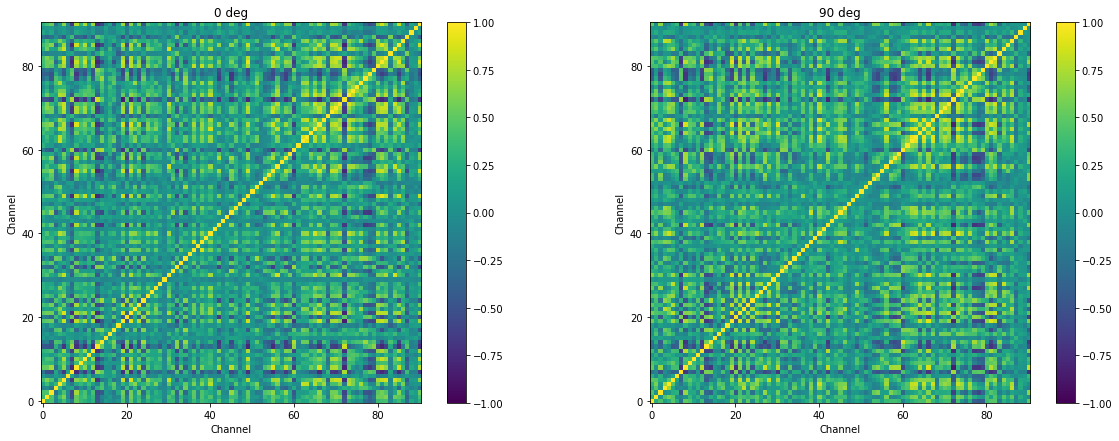

In [42]:
fig = plt.figure(figsize=[20,7])

for oind, ortn in enumerate(orientations):
    ax = fig.add_subplot(1, 2, oind+1)
    plt.imshow(corr_matrix[:,:,oind], clim=(-1, 1), cmap='viridis')
    ax.invert_yaxis()
    plt.colorbar()
    plt.title(str(int(ortn)) + ' deg')
    plt.xlabel('Channel')
    plt.ylabel('Channel')

Nylen and Wallisch go on to show how we can tidy up the correlation matrix to focus on information of interest, while eliminating distracting or irrelevant factors (noise; where "noise" can be defined as "information not relevant to the research question"). 

These steps include:
- remove noisy channels
- use data only from the time points when the stimulus was on
- smooth the PSTHs by convolving with a kernel

### Remove noisy channels

Nylen and Wallisch provide a list of these for us, which we will use for convenience. If you cross-referenec the channels in the list below, with the plot of all 91 channels above, you'll be able to see that these are indeed noisy looking. For example, they don't show an initial peak after stimulus onset, nor any apparent relationship with the stimulus.

In general, "eyeballing" data to remove noise is the least-desirable way to do this. It is highly subjective, meaning that it is sensitive to individual bias, and is not reproducible scientific practice. It is better to define objective criteria to categorize noise. However, for now we will take the list of noisy channels as a given for the sake of focusing on improving the correlation matrix.

To do this we will go back to the original pandas DataFrame and slice that, because it's so fast and easy.

In [43]:
noisy = [7, 16, 32, 37, 39, 41, 43, 45, 47, 48, 51, 52, 54, 94, 95]
df_clean = df[~df['channel'].isin(noisy)]
clean_chans = sorted(df_clean['channel'].unique())

In [44]:
psth_clean = [np.histogram(df_clean[(df_clean['orientation']==ortn) & (df_clean['channel']==chan)]['time'],
                           bins=time_base
                           )
              for ortn in orientations
              for chan in clean_chans]

# Generate the labels so we know what's what in the list above.
# Be sure to do the nested for loops in the same order (orientation then sort_code)
psth_labels = [[ortn, chan] for ortn in orientations for chan in clean_chans]

In [45]:
corr_matrix_clean = np.zeros(shape=(len(clean_chans), len(clean_chans), len(orientations)))
pvals = np.zeros(shape=(len(clean_chans), len(clean_chans), len(orientations)))

for row_ind, row_key in enumerate(clean_chans): 
    for col_ind, col_key in enumerate(clean_chans): 
        for oind, ortn in enumerate(orientations): 
            corr_matrix_clean[row_ind, col_ind, oind], pvals[row_ind, col_ind, oind] = sc.pearsonr(psth_clean[psth_labels.index([ortn, row_key])][0],
                                                                           psth_clean[psth_labels.index([ortn, col_key])][0]  
                                                                          ) 

#### Visualize the matrix

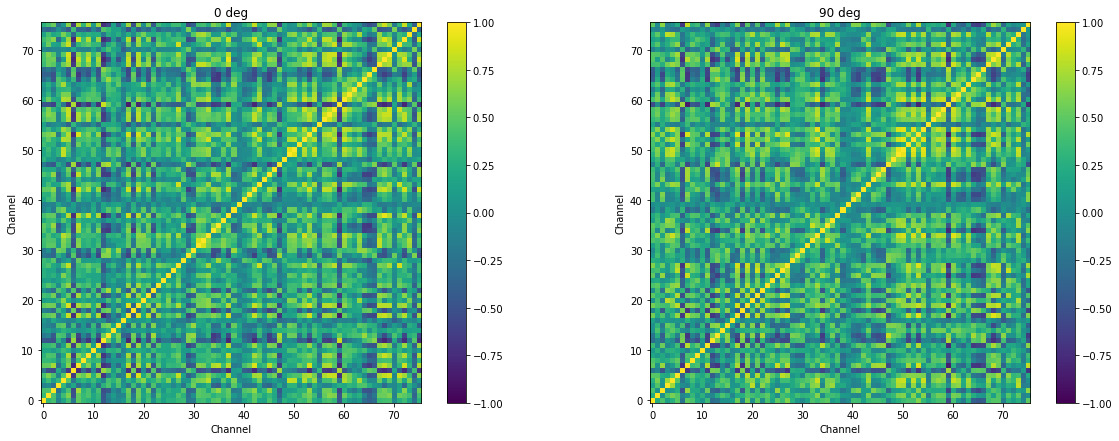

In [46]:
fig = plt.figure(figsize=[20,7])

for oind, ortn in enumerate(orientations):
    ax = fig.add_subplot(1, 2, oind+1)
    plt.imshow(corr_matrix_clean[:,:,oind], clim=(-1, 1), cmap='viridis')
    ax.invert_yaxis()
    plt.colorbar()
    plt.title(str(int(ortn)) + ' deg')
    plt.xlabel('Channel')
    plt.ylabel('Channel')

### Restrict time range

In [47]:
df_stim = df_clean[(df_clean['time'] > grating_on_time) & (df_clean['time'] < grating_off_time)]

# Also need to restrict the time_base for computing histograms
time_base_stim = np.arange(grating_on_time, grating_off_time, .01) 

In [48]:
psth_stim = [np.histogram(df_stim[(df_stim['orientation']==ortn) & (df_stim['channel']==chan)]['time'],
                     bins=time_base_stim
                    )
        for ortn in orientations
        for chan in clean_chans]

In [49]:
corr_matrix_stim = np.zeros(shape=(len(clean_chans), len(clean_chans), len(orientations)))
for row_ind, row_key in enumerate(clean_chans): 
    for col_ind, col_key in enumerate(clean_chans): 
        for oind, ortn in enumerate(orientations): 
            corr_matrix_stim[row_ind, col_ind, oind], pvals = sc.pearsonr(psth_stim[psth_labels.index([ortn, row_key])][0],
                                                                          psth_stim[psth_labels.index([ortn, col_key])][0]  
                                                                          ) 

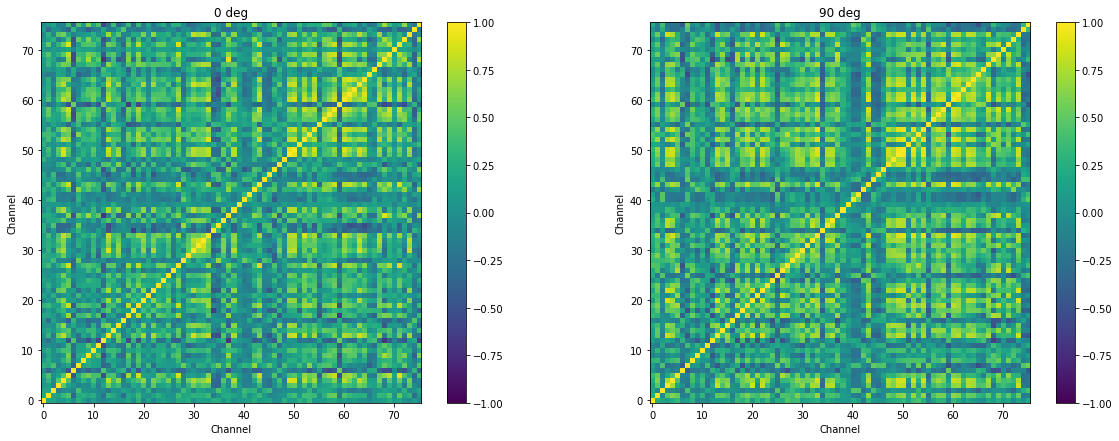

In [50]:
fig = plt.figure(figsize=[20,7])

for oind, ortn in enumerate(orientations):
    ax = fig.add_subplot(1, 2, oind+1)
    plt.imshow(corr_matrix_stim[:,:,oind], clim=(-1, 1), cmap='viridis')
    ax.invert_yaxis()
    plt.colorbar()
    plt.title(str(int(ortn)) + ' deg')
    plt.xlabel('Channel')
    plt.ylabel('Channel')